<a href="https://colab.research.google.com/github/PranavKKK2311/armstrong_number/blob/main/Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

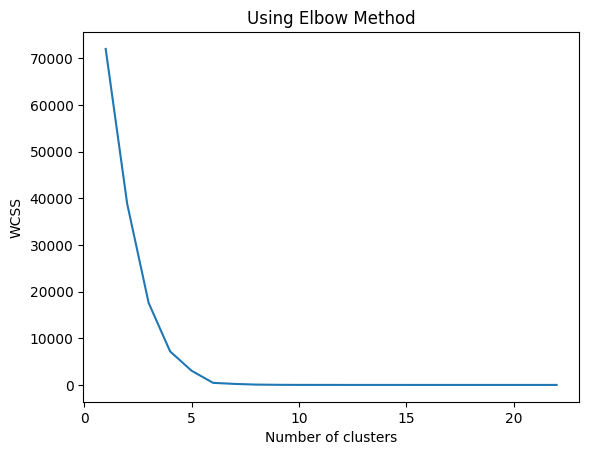

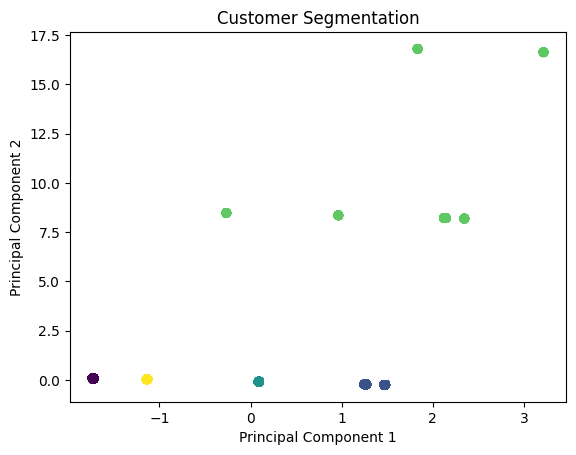

In [1]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('/content/customers-data - customers-data.csv')


X = df[['products_purchased','complains','money_spent']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 23):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 23), wcss)
plt.title('Using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 5


kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=900, n_init=20, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

